<a href="https://colab.research.google.com/github/nitish9966/DWDM/blob/main/Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Experiment:-1

In [117]:
data=pd.read_csv("housing.csv")
print(data.head())

      RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0


In [118]:
independent=data.drop('MEDV',axis=1).values
target=data['MEDV'].values
print(independent)
print(target)

[[ 6.575  4.98  15.3  ]
 [ 6.421  9.14  17.8  ]
 [ 7.185  4.03  17.8  ]
 ...
 [ 6.976  5.64  21.   ]
 [ 6.794  6.48  21.   ]
 [ 6.03   7.88  21.   ]]
[ 504000.  453600.  728700.  701400.  760200.  602700.  480900.  569100.
  346500.  396900.  315000.  396900.  455700.  428400.  382200.  417900.
  485100.  367500.  424200.  382200.  285600.  411600.  319200.  304500.
  327600.  291900.  348600.  310800.  386400.  441000.  266700.  304500.
  277200.  275100.  283500.  396900.  420000.  441000.  518700.  646800.
  732900.  558600.  531300.  518700.  445200.  405300.  420000.  348600.
  302400.  407400.  413700.  430500.  525000.  491400.  396900.  743400.
  518700.  663600.  489300.  411600.  392700.  336000.  466200.  525000.
  693000.  493500.  407400.  462000.  365400.  438900.  508200.  455700.
  478800.  491400.  506100.  449400.  420000.  436800.  445200.  426300.
  588000.  501900.  520800.  480900.  501900.  558600.  472500.  466200.
  495600.  602700.  474600.  462000.  480900.  

In [119]:
missing_values=data.isnull().sum()
print(missing_values)

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64


Experiment-2

In [120]:
data1=pd.read_csv("data.csv")
print(data1.head())

         id diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst  Unnamed: 32
0    842302         M        17.99  ...          0.4601                  0.11890          NaN
1    842517         M        20.57  ...          0.2750                  0.08902          NaN
2  84300903         M        19.69  ...          0.3613                  0.08758          NaN
3  84348301         M        11.42  ...          0.6638                  0.17300          NaN
4  84358402         M        20.29  ...          0.2364                  0.07678          NaN

[5 rows x 33 columns]


In [121]:
# dealing categorical data
# Converting a numerical data into categorical data
data1["radius_category"]=pd.cut(data1["radius_mean"],
                                bins=[0,10,20,30,np.inf],
                                labels=['0-10','10-20','20-30','>30'])
print(data1.head())

         id diagnosis  radius_mean  ...  fractal_dimension_worst  Unnamed: 32  radius_category
0    842302         M        17.99  ...                  0.11890          NaN            10-20
1    842517         M        20.57  ...                  0.08902          NaN            20-30
2  84300903         M        19.69  ...                  0.08758          NaN            10-20
3  84348301         M        11.42  ...                  0.17300          NaN            10-20
4  84358402         M        20.29  ...                  0.07678          NaN            20-30

[5 rows x 34 columns]


In [122]:
# Converting a categorical data into numerical data using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data1["category_num"]=label_encoder.fit_transform(data1['radius_category'])
print(data1["category_num"])
print(data1.head())

0      1
1      2
2      1
3      1
4      2
      ..
564    2
565    2
566    1
567    2
568    0
Name: category_num, Length: 569, dtype: int64
         id diagnosis  radius_mean  ...  Unnamed: 32  radius_category  category_num
0    842302         M        17.99  ...          NaN            10-20             1
1    842517         M        20.57  ...          NaN            20-30             2
2  84300903         M        19.69  ...          NaN            10-20             1
3  84348301         M        11.42  ...          NaN            10-20             1
4  84358402         M        20.29  ...          NaN            20-30             2

[5 rows x 35 columns]


In [123]:
X=data1['radius_mean'].values
y=data1['radius_category'].values
print(X,y)

[17.99  20.57  19.69  11.42  20.29  12.45  18.25  13.71  13.    12.46
 16.02  15.78  19.17  15.85  13.73  14.54  14.68  16.13  19.81  13.54
 13.08   9.504 15.34  21.16  16.65  17.14  14.58  18.61  15.3   17.57
 18.63  11.84  17.02  19.27  16.13  16.74  14.25  13.03  14.99  13.48
 13.44  10.95  19.07  13.28  13.17  18.65   8.196 13.17  12.05  13.49
 11.76  13.64  11.94  18.22  15.1   11.52  19.21  14.71  13.05   8.618
 10.17   8.598 14.25   9.173 12.68  14.78   9.465 11.31   9.029 12.78
 18.94   8.888 17.2   13.8   12.31  16.07  13.53  18.05  20.18  12.86
 11.45  13.34  25.22  19.1   12.    18.46  14.48  19.02  12.36  14.64
 14.62  15.37  13.27  13.45  15.06  20.26  12.18   9.787 11.6   14.42
 13.61   6.981 12.18   9.876 10.49  13.11  11.64  12.36  22.27  11.34
  9.777 12.63  14.26  10.51   8.726 11.93   8.95  14.87  15.78  17.95
 11.41  18.66  24.25  14.5   13.37  13.85  13.61  19.    15.1   19.79
 12.19  15.46  16.16  15.71  18.45  12.77  11.71  11.43  14.95  11.28
  9.738 16.11  11.4

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X=X.reshape(-1,1)
print(type(X))
print(np.shape(X))
X_data=scaler.fit_transform(X)
print(X_data)

In [125]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_data,y,test_size=0.3,random_state=42)

In [ ]:
print(X_test,y_test)

Experiment-3

In [ ]:
iris=pd.read_csv("IRIS.csv")
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [ ]:
X_iris=iris.drop('species',axis=1).values
y_iris=iris['species'].values
print(X_iris,y_iris)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim=cosine_similarity(X_iris[[0]],X_iris[[1]])
print(cosine_sim)

[[0.99857916]]


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

euclidean_dis=euclidean_distances(X_iris[[0]],X_iris[[1]])
print(euclidean_dis)

[[0.53851648]]


In [ ]:
from scipy.stats import pearsonr

pearson=pearsonr(iris['petal_length'],iris['petal_width'])
print(pearson)

PearsonRResult(statistic=0.9627570970509661, pvalue=5.7766609884951665e-86)


In [ ]:
from sklearn.metrics import jaccard_score

# Assuming X_iris is your NumPy array and 'species' is the column containing the species information
jaccard_sim = jaccard_score([y_iris[0]],[y_iris[1]],average='micro')

print(jaccard_sim)


1.0


In [ ]:
from sklearn.metrics.pairwise import manhattan_distances

manhattan_dis=manhattan_distances(X_iris[[0],:-1],X_iris[[1],:-1])

print(manhattan_dis[0][0])

0.6999999999999993


Experiment-4 Linear Regression

In [ ]:
boston=pd.read_csv("housing.csv")
print(boston.head())

      RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0


In [ ]:
X_boston=boston.drop('MEDV',axis=1).values
y_boston=boston['MEDV'].values

In [ ]:
missing=boston.isnull().sum()
print(missing)

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_boston,y_boston,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

meansq=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [ ]:
print('Mean_square_error:-',meansq)
print('R2 score:-',r2)

Mean_square_error:- 6789025559.26586
R2 score:- 0.6910934003098526


In [ ]:
new_test=np.array([[0.02,396.9,4.98]])

new_pred=lr.predict(new_test)
print(new_pred)

[-3901792.4154484]


Experiment-5 Decission Tree Classifier

In [ ]:
tree=pd.read_csv("IRIS.csv")
print(tree.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [ ]:
X_tree=tree.drop('species',axis=1).values
y_tree=tree['species'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_tree,y_tree,test_size=0.2,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred=dt_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,y_pred)

In [ ]:
print('Accuracy Score:-',accuracy)

Accuracy Score:- 1.0


Experiment-6 Navie Bayes

In [6]:
navie=pd.read_csv("data.csv")
print(navie.head())

         id diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst  Unnamed: 32
0    842302         M        17.99  ...          0.4601                  0.11890          NaN
1    842517         M        20.57  ...          0.2750                  0.08902          NaN
2  84300903         M        19.69  ...          0.3613                  0.08758          NaN
3  84348301         M        11.42  ...          0.6638                  0.17300          NaN
4  84358402         M        20.29  ...          0.2364                  0.07678          NaN

[5 rows x 33 columns]


In [7]:
X_navie=navie['radius_mean'].values
# print(y_navie)
X_navie=X_navie.reshape(-1,1)
print(X_navie.shape)

(569, 1)


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
navie['diagno']=le.fit_transform(navie['diagnosis'])
print(navie.head())

         id diagnosis  radius_mean  ...  fractal_dimension_worst  Unnamed: 32  diagno
0    842302         M        17.99  ...                  0.11890          NaN       1
1    842517         M        20.57  ...                  0.08902          NaN       1
2  84300903         M        19.69  ...                  0.08758          NaN       1
3  84348301         M        11.42  ...                  0.17300          NaN       1
4  84358402         M        20.29  ...                  0.07678          NaN       1

[5 rows x 34 columns]


In [9]:
y_navie=navie['diagno'].values
print(y_navie)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_navie,y_navie,test_size=0.2,random_state=42)

In [ ]:
print(X_train,y_train)

In [12]:
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()

model.fit(X_train,y_train)

GaussianNB()

In [13]:
y_pred=model.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(y_test,y_pred)

In [15]:
print("Accuracy Score",acc)

Accuracy Score 0.9298245614035088


Experiment-7 Apriori

In [1]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [21]:
basket=pd.read_csv("bread_basket.csv",header=None)
print(basket.head())

             0              1                 2           3                4
0  Transaction           Item         date_time  period_day  weekday_weekend
1            1          Bread  30-10-2016 09:58     morning          weekend
2            2   Scandinavian  30-10-2016 10:05     morning          weekend
3            2   Scandinavian  30-10-2016 10:05     morning          weekend
4            3  Hot chocolate  30-10-2016 10:07     morning          weekend


In [23]:
onehot=pd.get_dummies(basket)

frequent_items=apriori(onehot,min_support=0.1,use_colnames=True)
association=association_rules(frequent_items,metric="lift",min_threshold=1)

In [24]:
print("Frequent Items:-",frequent_items)
print("Association Rules:-",association)

Frequent Items:-      support                  itemsets
0   0.162132                 (1_Bread)
1   0.266774                (1_Coffee)
2   0.564121             (3_afternoon)
3   0.409791               (3_morning)
4   0.624488               (4_weekday)
5   0.375463               (4_weekend)
6   0.102009      (4_weekday, 1_Bread)
7   0.137654   (3_afternoon, 1_Coffee)
8   0.124878     (3_morning, 1_Coffee)
9   0.172762     (4_weekday, 1_Coffee)
10  0.354642  (4_weekday, 3_afternoon)
11  0.209479  (3_afternoon, 4_weekend)
12  0.252292    (4_weekday, 3_morning)
13  0.157500    (3_morning, 4_weekend)
Association Rules:-      antecedents    consequents  antecedent support  ...  leverage  conviction  zhangs_metric
0    (4_weekday)      (1_Bread)            0.624488  ...  0.000760    1.001454       0.019829
1      (1_Bread)    (4_weekday)            0.162132  ...  0.000760    1.012634       0.008887
2    (3_morning)     (1_Coffee)            0.409791  ...  0.015556    1.054601       0.211066
3 

Experiment-8 KMeans Clustering

In [55]:
from sklearn.cluster import KMeans

mean=pd.read_csv("IRIS.csv")
print(mean.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [85]:
X_data=mean.drop('species',axis=1)
kmeans=KMeans(n_clusters=3,init='k-means++',n_init=10)
kmeans.fit(X_data)
X_pred=kmeans.predict(X_data)


In [86]:
print(X_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


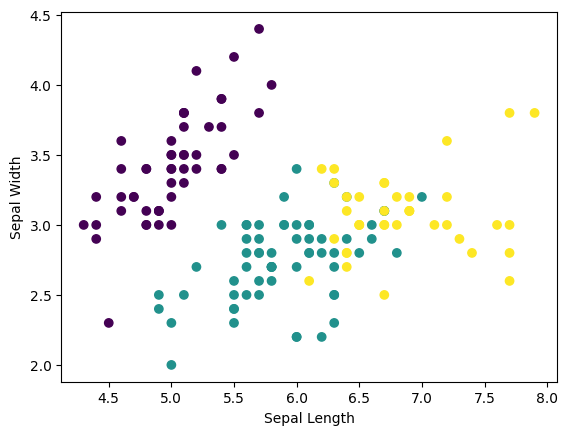

In [88]:
plt.scatter(X_data['sepal_length'],X_data['sepal_width'],c=X_pred)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

Experiment-9 Hierarchical Clustering

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [91]:
cluster=pd.read_csv("IRIS.csv")
X_cluster=cluster.drop('species',axis=1)

In [95]:
scaler=StandardScaler()
sc=scaler.fit_transform(X_cluster)

In [97]:
clustering=AgglomerativeClustering(n_clusters=3,linkage='ward')
clustering.fit(sc)

AgglomerativeClustering(n_clusters=3)

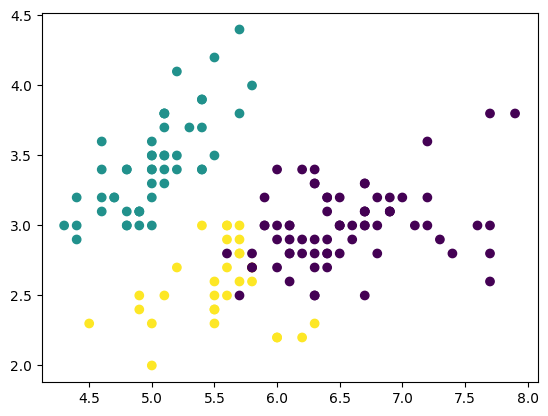

In [105]:
plt.scatter(X_cluster.iloc[:,0],X_cluster.iloc[:,1],c=clustering.labels_,cmap='viridis')
plt.show()

Experiment-10 DCSCAN Clustering

In [107]:
from sklearn.cluster import DBSCAN
scan=pd.read_csv("IRIS.csv")
X_scan=scan.drop('species',axis=1)


In [112]:
dbscan=DBSCAN(eps=0.5,min_samples=5)
dbscan.fit(X_scan)
labels=dbscan.labels_

In [115]:
print(labels)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


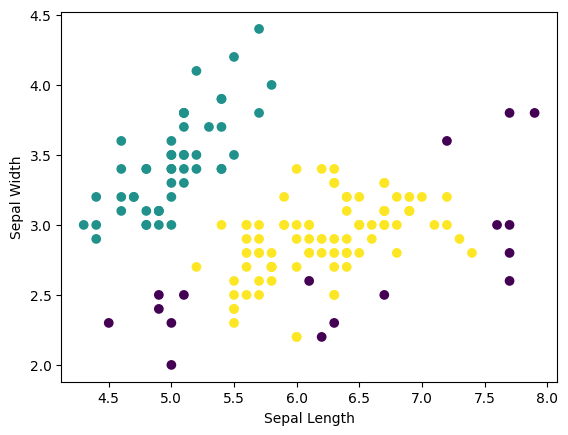

In [116]:
plt.scatter(X_scan['sepal_length'],X_scan['sepal_width'],c=labels)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()